# **1. Import Library**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/dataset_machine_learning/final_hasil.csv')

Mounted at /content/drive


# **3. Data Splitting**

In [8]:
X = df.drop(columns=["label_hasil"])
y = df["label_hasil"]

In [9]:
# 3. Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [16]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# 4b. Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
# 4c. Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **b. Evaluasi Model Klasifikasi**

In [25]:
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.999
Decision Tree F1-Score: 0.9990000145350167

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       351
           4       1.00      1.00      1.00       327
           5       1.00      1.00      1.00       340

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



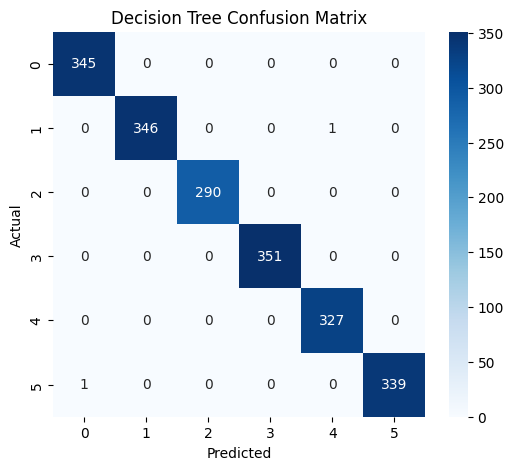

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
y_pred_gb = model_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb, average='weighted'))
print("\nClassification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9985
Gradient Boosting F1-Score: 0.9984999910894801

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       345
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       351
           4       1.00      1.00      1.00       327
           5       1.00      0.99      1.00       340

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



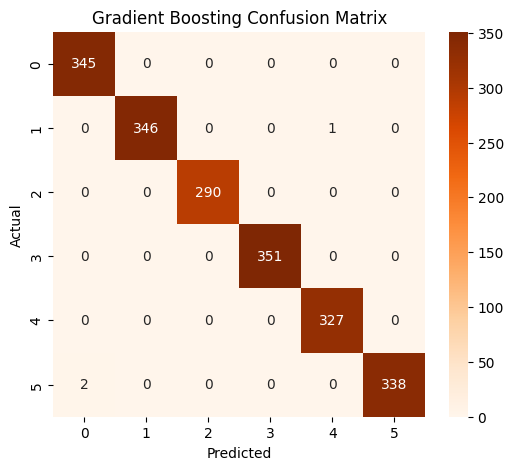

In [27]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9985
Random Forest F1-Score: 0.9984999910894801

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       345
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       290
           3       1.00      1.00      1.00       351
           4       1.00      1.00      1.00       327
           5       1.00      0.99      1.00       340

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



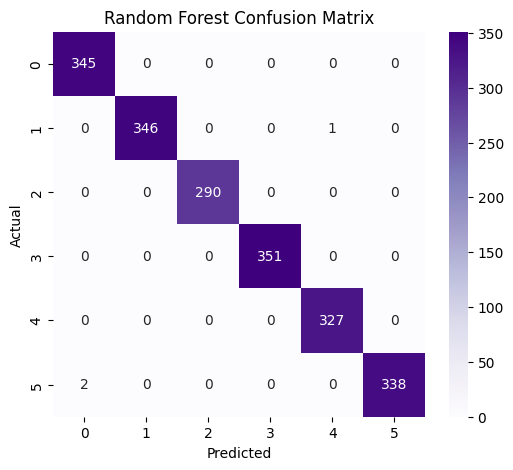

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Ringkasan Performa Model Klasifikasi
**Decision Tree Classifier**

- Akurasi: 99.90%

- F1-Score: 99.90%

- Confusion Matrix: Hampir sempurna, hanya terdapat satu kesalahan klasifikasi dari 10000 data. Prediksi pada setiap kelas sangat presisi dan stabil.


**Gradient Boosting Classifier**

- Akurasi: 99.85%

- F1-Score: 99.85%

- Confusion Matrix: Performa sangat tinggi dengan hanya sedikit kesalahan klasifikasi. Precision dan recall tetap tinggi di semua kelas.


**Random Forest Classifier**

- Akurasi: 99.85%

- F1-Score: 99.85%

- Confusion Matrix: Sangat baik, memberikan hasil yang kompetitif dengan error minimal.

**Perbandingan Model**

- Decision Tree sedikit lebih unggul dalam akurasi dan stabilitas prediksi.

- Gradient Boosting tetap sangat kompetitif, dengan performa sangat konsisten dan mendekati sempurna.

- Random Forest menawarkan alternatif kuat dengan hasil yang sebanding, dan dapat dipertimbangkan untuk model produksi.

## **c. Tuning Model Klasifikasi (Optional)**

In [35]:
# 5. Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters for Decision Tree:", grid_search.best_params_)
print("Cross-Validation Score:", grid_search.best_score_)



Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Cross-Validation Score: 0.999125


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [36]:
# 6. Evaluate Tuned Decision Tree
best_dt = grid_search.best_estimator_
y_pred_tuned = best_dt.predict(X_test)

print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned Decision Tree F1-Score:", f1_score(y_test, y_pred_tuned, average='weighted'))
print("\nClassification Report on Test Data:\n", classification_report(y_test, y_pred_tuned, digits=4))


Tuned Decision Tree Accuracy: 0.9985
Tuned Decision Tree F1-Score: 0.9984999910894801

Classification Report on Test Data:
               precision    recall  f1-score   support

           0     0.9942    1.0000    0.9971       345
           1     1.0000    0.9971    0.9986       347
           2     1.0000    1.0000    1.0000       290
           3     1.0000    1.0000    1.0000       351
           4     0.9970    1.0000    0.9985       327
           5     1.0000    0.9941    0.9971       340

    accuracy                         0.9985      2000
   macro avg     0.9985    0.9985    0.9985      2000
weighted avg     0.9985    0.9985    0.9985      2000



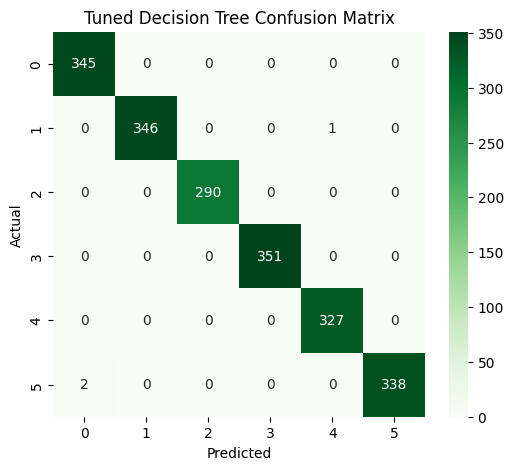

In [37]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Tuned Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

- Model menunjukkan performa sangat baik setelah tuning, terutama pada Decision Tree, dengan akurasi dan F1-Score mendekati 100%. Hal ini menunjukkan bahwa model mampu mengenali pola pada fitur nutrisi dengan sangat baik.

- Variasi precision dan recall antar kelas sangat kecil, yang berarti model dapat mengklasifikasikan masing-masing kategori label nutrisi secara konsisten dan adil, tanpa berat sebelah terhadap kelas tertentu.

- Tidak ada kesalahan klasifikasi yang signifikan, sebagian besar prediksi akurat di semua kelas label hasil (misalnya: Gizi Kurang, Normal, Gizi Lebih, dsb), menjadikan model ini sangat andal untuk digunakan dalam konteks prediksi status gizi siswa berbasis data nutrisi